# Compare abrupt-4xCO2 with other abrupt CO2 experiments

In [1]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from scipy import optimize
from estimation import *

In [7]:
directory = '../../longrunmip_data/'
#all_models = ['MPIESM12', 'MIROC32', 'IPSLCM5A', 'HadGEM2', 'HadCM3L', 'GISSE2R', 'GFDLESM2M', 'GFDLCM3', 'FAMOUS', 'ECHAM5MPIOM', 'ECEARTH', 'CNRMCM61', 'CESM104', 'CCSM3']

file_list = [ f.name for f in os.scandir(directory) if f.is_file()]
file_list_namesplits = [file.rsplit("_") for file in file_list]
file_list_namesplits[:10]
files_model_names = [file_list_namesplits[k][1] for k in range(len(file_list_namesplits))]

In [8]:
files_model_names;

In [9]:
file_list[:10]

['netTOA_MPIESM11_abrupt4x_4459_anom.nc',
 'netTOA_FAMOUS_abrupt4x_3000_anom.nc',
 'tas_HadCM3L_abrupt8x_1000_anom.nc',
 'tas_FAMOUS_abrupt2x_3000_anom.nc',
 'netTOA_CCSM3_abrupt8x_1450_anom.nc',
 'netTOA_GISSE2R_1pct4x_5001_anom.nc',
 'tas_CESM104_abrupt2x_2500_anom.nc',
 'tas_MPIESM12_abrupt16x_999_anom.nc',
 'netTOA_HadCM3L_abrupt4x_1000_anom.nc',
 'tas_ECHAM5MPIOM_1pct4x_6080_anom.nc']

In [10]:
file_list_namesplits[1][1]

'FAMOUS'

In [11]:
experiments = {'MPIESM12': ['abrupt2x', 'abrupt4x', 'abrupt8x', 'abrupt16x'],
               'HadCM3L': ['abrupt2x', 'abrupt4x', 'abrupt6x', 'abrupt8x'],
               'FAMOUS': ['abrupt2x', 'abrupt4x'],
               'CNRMCM61': ['abrupt2x', 'abrupt4x'], #but this may be a duplicate of the CMIP6 runs?
               'CESM104': ['abrupt2x', 'abrupt4x', 'abrupt8x'],
               'CCSM3': ['abrupt2x', 'abrupt4x', 'abrupt8x']
              }

In [12]:
experiments.keys()

dict_keys(['MPIESM12', 'HadCM3L', 'FAMOUS', 'CNRMCM61', 'CESM104', 'CCSM3'])

In [13]:
model_index = [i for i,x in enumerate(files_model_names) if x=='MPIESM12']
model_files = [file_list[model_index[k]] for k in range(len(model_index))]
model_exp_files = [file_list[model_index[k]] for k in range(len(model_index)) if file_list_namesplits[model_index[k]][2] == 'abrupt2x']
model_exp_files

['netTOA_MPIESM12_abrupt2x_1000_anom.nc', 'tas_MPIESM12_abrupt2x_1000_anom.nc']

In [14]:
model = 'MPIESM12'
experiments[model]

['abrupt2x', 'abrupt4x', 'abrupt8x', 'abrupt16x']

In [15]:
f16x = etminan_co2forcing(16*284.3169998547858) # NB: outside validity range of formula
f8x = etminan_co2forcing(8*284.3169998547858) # NB: outside validity range of formula
f6x = etminan_co2forcing(6*284.3169998547858)
f4x = etminan_co2forcing(4*284.3169998547858)
f2x = etminan_co2forcing(2*284.3169998547858)
f0p5x = etminan_co2forcing(0.5*284.3169998547858) # NB: outside validity range of formula. But ratio to 2x is close to -1, as we should expect.
print('16xCO2 forcing =', f16x)
print('8xCO2 forcing =', f8x)
print('6xCO2 forcing =', f6x)
print('4xCO2 forcing =', f4x)
print('2xCO2 forcing =', f2x)
print('0.5xCO2 forcing =', f0p5x)

# Assuming ERF scales like Etminan RF, the ratios should be:

print('16x / 2x =', f16x/f2x )
print('8x / 2x =', f8x/f2x )
print('6x / 2x =', f6x/f2x )
print('4x / 2x =', f4x/f2x )
print('2x / 4x =', f2x/f4x )
print('2x / 0.5x =', f2x/f0p5x )

16xCO2 forcing = 11.112914700873587
8xCO2 forcing = 12.02954864821404
6xCO2 forcing = 10.46600720871733
4xCO2 forcing = 7.960357579130032
2xCO2 forcing = 3.8039731104119823
0.5xCO2 forcing = -3.743112284453599
16x / 2x = 2.9213967550023043
8x / 2x = 3.162364269949112
6x / 2x = 2.7513357494747983
4x / 2x = 2.092642967780574
2x / 4x = 0.4778646025129576
2x / 0.5x = -1.0162594176539024


In [16]:
print('2x / 16x =', f2x/f16x )
print('2x / 8x =', f2x/f8x )
print('2x / 6x =', f2x/f6x )
print('2x / 4x =', f2x/f4x )
#print('4x / 2x =', f4x/f2x )
print('2x / 0p5x =', f2x/f0p5x )

2x / 16x = 0.34230201641995434
2x / 8x = 0.31621910527596864
2x / 6x = 0.3634598213580039
2x / 4x = 0.4778646025129576
2x / 0p5x = -1.0162594176539024


In [17]:
f0p5x/f2x

-0.9840007213006319

In [18]:
# find T in year 500 to be used for sorting the models in the figure:
T_year500_abrupt2x = {}
exp = 'abrupt2x'
for (m, model) in enumerate(experiments.keys()):
    T_year500_abrupt2x[model] = []
    model_index = [i for i,x in enumerate(files_model_names) if x==model]
    model_files = [file_list[model_index[k]] for k in range(len(model_index))]
    model_exp_files = [file_list[model_index[k]] for k in range(len(model_index)) if file_list_namesplits[model_index[k]][2] == exp]
    model_exp_files.sort() # make sure tas is the last file
    #print(model_exp_files)
    ds_tas = xr.open_dataset(directory + model_exp_files[-1])
    deltaT0 = np.concatenate([[0],ds_tas.tas.values])

    T_year500_abrupt2x[model].append(deltaT0[501])
        
T_year500_abrupt2x_sorted = dict(reversed(sorted(T_year500_abrupt2x.items(), key=lambda item: item[1])))
T_year500_abrupt2x_sorted

{'CNRMCM61': [3.8726806640625],
 'FAMOUS': [3.201995849609375],
 'MPIESM12': [2.59564208984375],
 'HadCM3L': [2.47784423828125],
 'CESM104': [2.406585693359375],
 'CCSM3': [1.8135986328125]}

# Estimate temperature ratios to be used to scale the other experiments to abrupt-2xCO2:

In [19]:
ds_tas

<xarray.Dataset>
Dimensions:  (ncl1: 6080)
Dimensions without coordinates: ncl1
Data variables:
    tas      (ncl1) float32 0.4749 0.7435 0.9148 1.068 1.002 ... nan nan nan nan

2
4
2
4
2
4
8
16
2
4
6
8
2
4
8
2
4
8


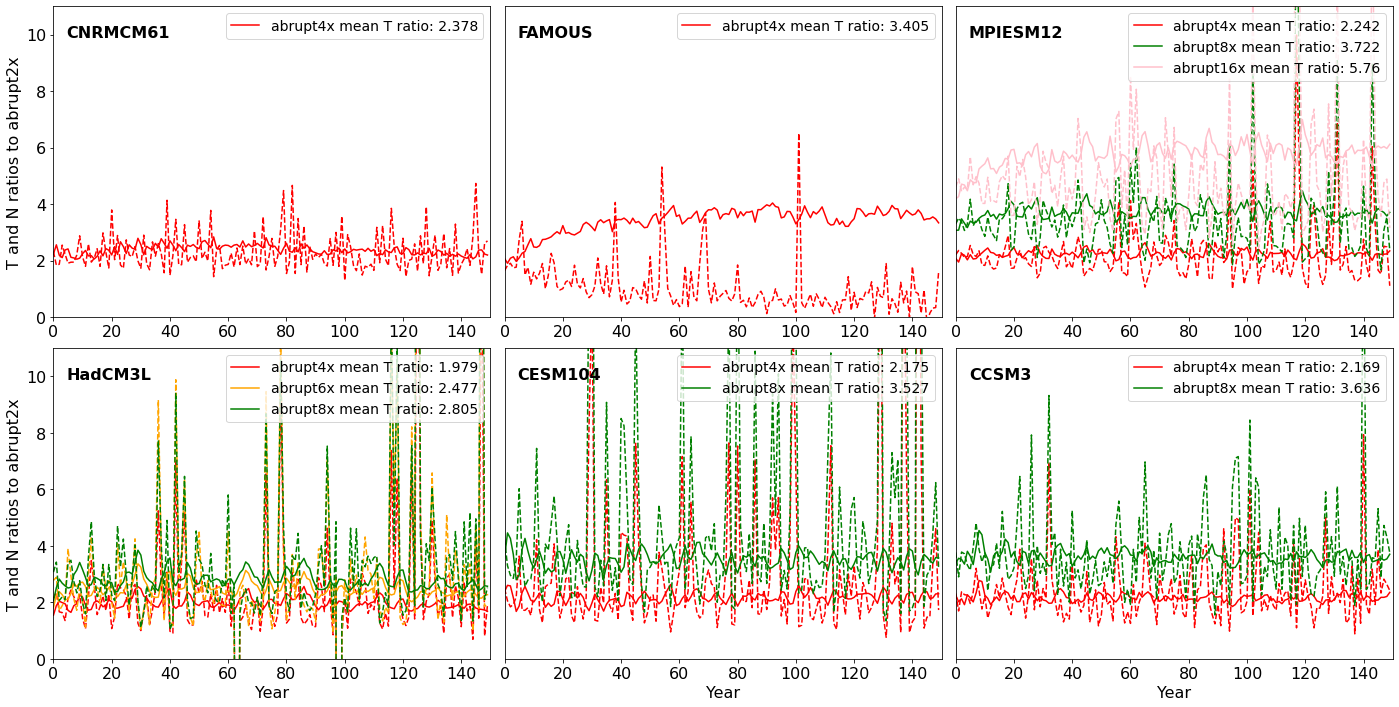

In [20]:
# Plot ratios to 2xCO2:

fig, axes = plt.subplots(ncols = 3, nrows = 2, figsize = (2*12,2*6))
axes = np.concatenate(axes)

mean_T_ratios = {}

for (m, model) in enumerate(T_year500_abrupt2x_sorted.keys()):
#for (m, model) in enumerate(experiments.keys()):
    mean_T_ratios[model] = {}
    ax = axes[m]
    ax.text(0.03, 0.9, model, fontweight = 'bold', fontsize = 16, transform=ax.transAxes)
    ax.tick_params(axis='both', labelsize = 16)
    ax.set_xlim(0,150)
    #ax.set_ylim(-10,10)
    
    # define x-label:
    if m in [3, 4, 5]:
        ax.set_xlabel('Year', fontsize = 16)
    #else: 
    #    ax.axes.xaxis.set_visible(False)
    if m in [0, 3]:
        ax.set_ylabel('T and N ratios to abrupt2x', fontsize = 16)
    else:
        ax.axes.yaxis.set_visible(False)

    for exp in experiments[model]:
        co2factor = exp[6:].replace('x','')
        print(co2factor)
        model_index = [i for i,x in enumerate(files_model_names) if x==model]
        model_files = [file_list[model_index[k]] for k in range(len(model_index))]
        model_exp_files = [file_list[model_index[k]] for k in range(len(model_index)) if file_list_namesplits[model_index[k]][2] == exp]
        model_exp_files.sort() # make sure tas is the last file
        #print(model_exp_files)
        ds_tas = xr.open_dataset(directory + model_exp_files[-1])
        deltaT = ds_tas.tas.values[:150]
        
        ds_toarad = xr.open_dataset(directory + model_exp_files[0])
        toarad = ds_toarad['netTOA'].values[:150]
        
        if exp == 'abrupt4x':
            color = 'red'
        elif exp == 'abrupt6x':
            color = 'orange'
        elif exp == 'abrupt8x':
            color = 'green'
        elif exp == 'abrupt16x': 
            color = 'pink'
            
        if exp == 'abrupt2x':
            tas_2x = deltaT
            toarad_2x = toarad
            
        else:
            T_ratio = deltaT/tas_2x
            N_ratio = toarad/toarad_2x
            ax.plot(T_ratio, color = color, label = exp + ' mean T ratio: ' + str(np.round(np.nanmean(T_ratio),3)))
            mean_T_ratios[model][exp] = np.nanmean(T_ratio)
            ax.plot(N_ratio, '--', color = color)
    ax.legend(fontsize = 14, loc = 'upper right')
    ax.set_ylim(0,11)
plt.subplots_adjust(hspace=0.1, wspace = 0.0325)

#plt.savefig('../Figures/abruptCO2exp_TandN_ratios_150yrs_longrunmip.pdf', format='pdf', dpi=600, bbox_inches="tight")

In [21]:
mean_T_ratios

{'CNRMCM61': {'abrupt4x': 2.3781066},
 'FAMOUS': {'abrupt4x': 3.4051063},
 'MPIESM12': {'abrupt4x': 2.241805,
  'abrupt8x': 3.7219262,
  'abrupt16x': 5.760491},
 'HadCM3L': {'abrupt4x': 1.9793433,
  'abrupt6x': 2.4768014,
  'abrupt8x': 2.8049552},
 'CESM104': {'abrupt4x': 2.1751935, 'abrupt8x': 3.5269563},
 'CCSM3': {'abrupt4x': 2.1688669, 'abrupt8x': 3.6357567}}

In [22]:
mean_T_ratios

{'CNRMCM61': {'abrupt4x': 2.3781066},
 'FAMOUS': {'abrupt4x': 3.4051063},
 'MPIESM12': {'abrupt4x': 2.241805,
  'abrupt8x': 3.7219262,
  'abrupt16x': 5.760491},
 'HadCM3L': {'abrupt4x': 1.9793433,
  'abrupt6x': 2.4768014,
  'abrupt8x': 2.8049552},
 'CESM104': {'abrupt4x': 2.1751935, 'abrupt8x': 3.5269563},
 'CCSM3': {'abrupt4x': 2.1688669, 'abrupt8x': 3.6357567}}

2
4
2
4
2
4
8
16
2
4
6
8
2
4
8
2
4
8


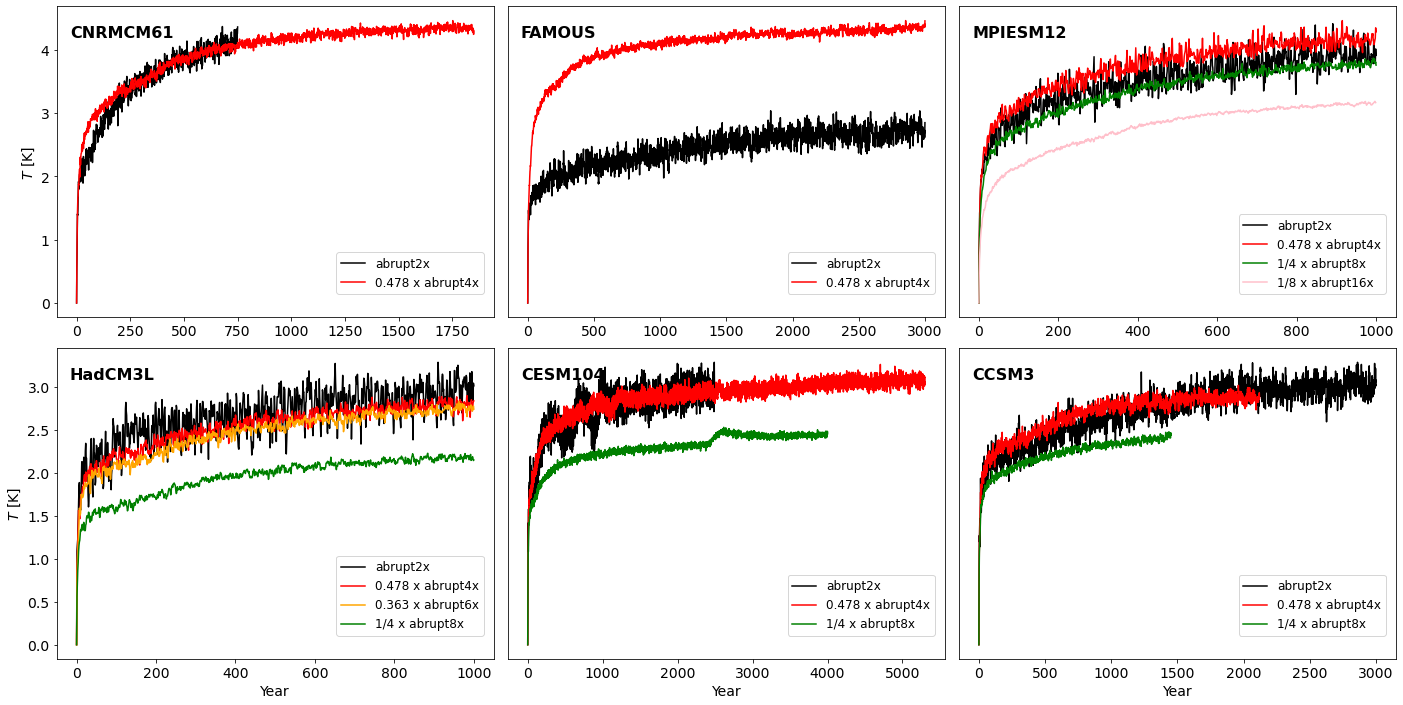

In [23]:
fig, axes = plt.subplots(ncols = 3, nrows = 2, figsize = (2*12,2*6))
axes = np.concatenate(axes)

T_year500_abrupt2x = {}
for (m, model) in enumerate(T_year500_abrupt2x_sorted.keys()):
    ax = axes[m]
    T_year500_abrupt2x[model] = []
    ax.text(0.03, 0.9, model, fontweight = 'bold', transform=ax.transAxes, fontsize = 16)
    ax.tick_params(axis='both', labelsize = 14)
    
    # define x-label:
    if m in [3, 4, 5]:
        ax.set_xlabel('Year', fontsize = 14)
    #else: 
    #    ax.axes.xaxis.set_visible(False)
    if m in [0, 3]:
        ax.set_ylabel('$T$ [K]', fontsize = 14)
    else:
        ax.axes.yaxis.set_visible(False)

    for exp in experiments[model]:
        co2factor = exp[6:].replace('x','')
        print(co2factor)
        model_index = [i for i,x in enumerate(files_model_names) if x==model]
        model_files = [file_list[model_index[k]] for k in range(len(model_index))]
        model_exp_files = [file_list[model_index[k]] for k in range(len(model_index)) if file_list_namesplits[model_index[k]][2] == exp]
        model_exp_files.sort() # make sure tas is the last file
        #print(model_exp_files)
        ds_tas = xr.open_dataset(directory + model_exp_files[-1])
        deltaT0 = np.concatenate([[0],ds_tas.tas.values])
        if exp == 'abrupt2x':
            deltaT0 *= 1 #0.476
            T_year500_abrupt2x[model].append(deltaT0[501])
            color = 'black'
            label = 'abrupt2x'
        elif exp == 'abrupt4x':
            deltaT0 *= f2x/f4x #0.476
            color = 'red'
            label = str(np.round(f2x/f4x, 3)) + ' x abrupt4x'
        elif exp == 'abrupt6x':
            deltaT0 *= f2x/f6x
            color = 'orange'
            label = str(np.round(f2x/f6x, 3)) + ' x abrupt6x'
        elif exp == 'abrupt8x':
            deltaT0 *= 1/4 
            #deltaT0 *= f2x/f8x  
            color = 'green'
            label = '1/4' + ' x abrupt8x'
            #label = str(np.round(f2x/f8x, 3)) + ' x abrupt8x'
        elif exp == 'abrupt16x':
            deltaT0 *= 1/8
            #deltaT0 *= f2x/f16x  
            color = 'pink'
            label = '1/8' + ' x abrupt16x'
        #if model == 'MPIESM12': # then define labels
        ax.plot(deltaT0, color = color, label = label)
        #else: 
        #    ax.plot(deltaT0, color = color)

    ax.legend(loc = (0.64,0.075), fontsize = 12)
plt.subplots_adjust(hspace=0.1, wspace = 0.0325)


In [24]:
experiments

{'MPIESM12': ['abrupt2x', 'abrupt4x', 'abrupt8x', 'abrupt16x'],
 'HadCM3L': ['abrupt2x', 'abrupt4x', 'abrupt6x', 'abrupt8x'],
 'FAMOUS': ['abrupt2x', 'abrupt4x'],
 'CNRMCM61': ['abrupt2x', 'abrupt4x'],
 'CESM104': ['abrupt2x', 'abrupt4x', 'abrupt8x'],
 'CCSM3': ['abrupt2x', 'abrupt4x', 'abrupt8x']}

2
4
2
4
2
4
8
16
2
4
6
8
2
4
8
2
4
8


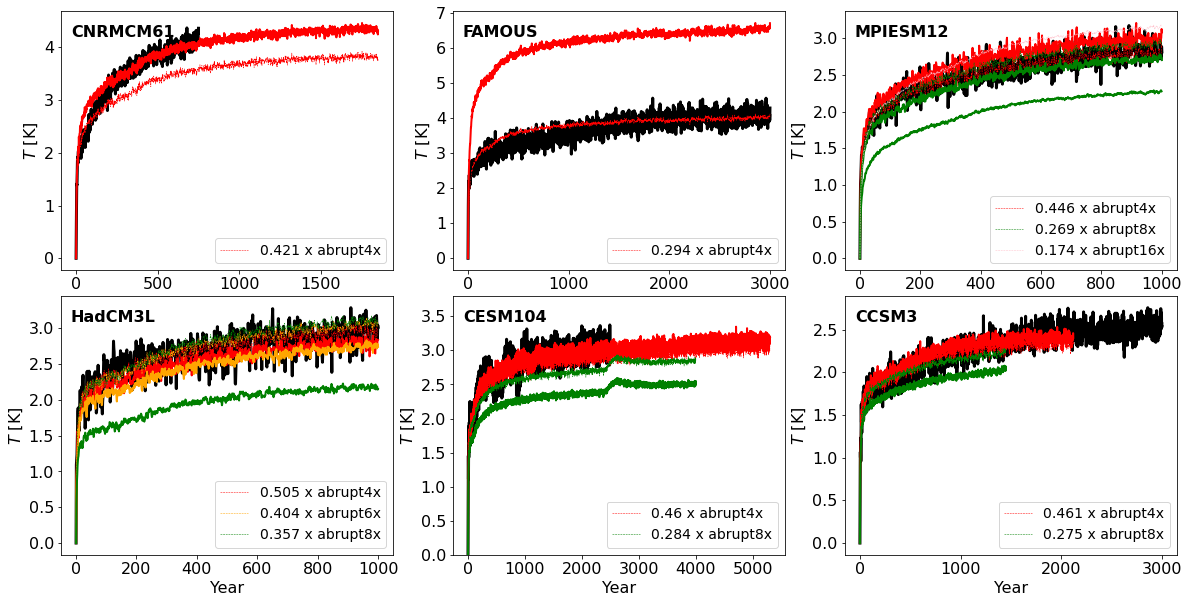

In [25]:
fig, axes = plt.subplots(ncols = 3, nrows = 2, figsize = (20,2*5))
axes = np.concatenate(axes)

for (m, model) in enumerate(T_year500_abrupt2x_sorted.keys()):
#for (m, model) in enumerate(experiments.keys()):
    ax = axes[m]
    ax.text(0.03, 0.9, model, fontweight = 'bold', transform=ax.transAxes, fontsize = 16)
    ax.tick_params(axis='both', labelsize = 16)
    if model == 'CESM104':
        ax.set_ylim(0,3.8) # just for more space between curve and model name
    #else: 
    #    ax.set_ylim(0,4)
    # define x-label:
    if m in [3, 4, 5]:
        ax.set_xlabel('Year', fontsize = 16)
    #else: 
    #    ax.axes.xaxis.set_visible(False)
    #if m in [0, 3]:
    ax.set_ylabel('$T$ [K]', fontsize = 16)
    #else:
    #    ax.axes.yaxis.set_visible(False)

    for exp in experiments[model]:
        co2factor = exp[6:].replace('x','')
        print(co2factor)
        model_index = [i for i,x in enumerate(files_model_names) if x==model]
        model_files = [file_list[model_index[k]] for k in range(len(model_index))]
        model_exp_files = [file_list[model_index[k]] for k in range(len(model_index)) if file_list_namesplits[model_index[k]][2] == exp]
        model_exp_files.sort() # make sure tas is the last file
        #print(model_exp_files)
        ds_tas = xr.open_dataset(directory + model_exp_files[-1])
        deltaT0 = np.concatenate([[0],ds_tas.tas.values])
        
        if exp == 'abrupt2x':
            color = 'black'
            ax.plot(deltaT0, color = color, linewidth = 3)
            continue
            
        # same ratio for all models first:   
        elif exp == 'abrupt4x':
            forcingratio = f2x/f4x #0.476
            color = 'red'
        elif exp == 'abrupt6x':
            forcingratio = f2x/f6x
            color = 'orange'
        elif exp == 'abrupt8x':
            forcingratio = 1/4 
            color = 'green'
        elif exp == 'abrupt16x':
            forcingratio = 1/8
        ax.plot(deltaT0*forcingratio, color = color, linewidth = 2)
        
        # then with forcing ratio computed from temperature ratio 
        if exp != 'abrupt2x':
            deltaT0 *= 1/mean_T_ratios[model][exp]
            
        if exp == 'abrupt4x':
            color = 'red'
            label = str(np.round(1/mean_T_ratios[model][exp],3)) + ' x abrupt4x'
        elif exp == 'abrupt6x':
            color = 'orange'
            label = str(np.round(1/mean_T_ratios[model][exp],3)) + ' x abrupt6x'
        elif exp == 'abrupt8x':
            color = 'green'
            label = str(np.round(1/mean_T_ratios[model][exp],3)) + ' x abrupt8x'
        elif exp == 'abrupt16x':
            color = 'pink'
            label = str(np.round(1/mean_T_ratios[model][exp],3)) + ' x abrupt16x'
            
        #if model == 'MPIESM12': # then define labels
        ax.plot(deltaT0, '--', color = color, label = label, linewidth = 0.5)
        #else: 
        #    ax.plot(deltaT0, color = color)
        
        
        
    ax.legend(loc = 'lower right', fontsize = 14)
    #ax.legend(loc = (0.58,0.075), fontsize = 14)
plt.subplots_adjust(hspace=0.1, wspace = 0.18)
#plt.subplots_adjust(hspace=0.1, wspace = 0.0325)
#plt.savefig('../Figures/abruptCO2exp_comparison_longrunmip.pdf', format='pdf', dpi=600, bbox_inches="tight")


In [57]:
experiments[model]

['abrupt2x', 'abrupt4x', 'abrupt8x']

2
4
2
4
2
4
8
16
2
4
6
8
2
4
8
2
4
8


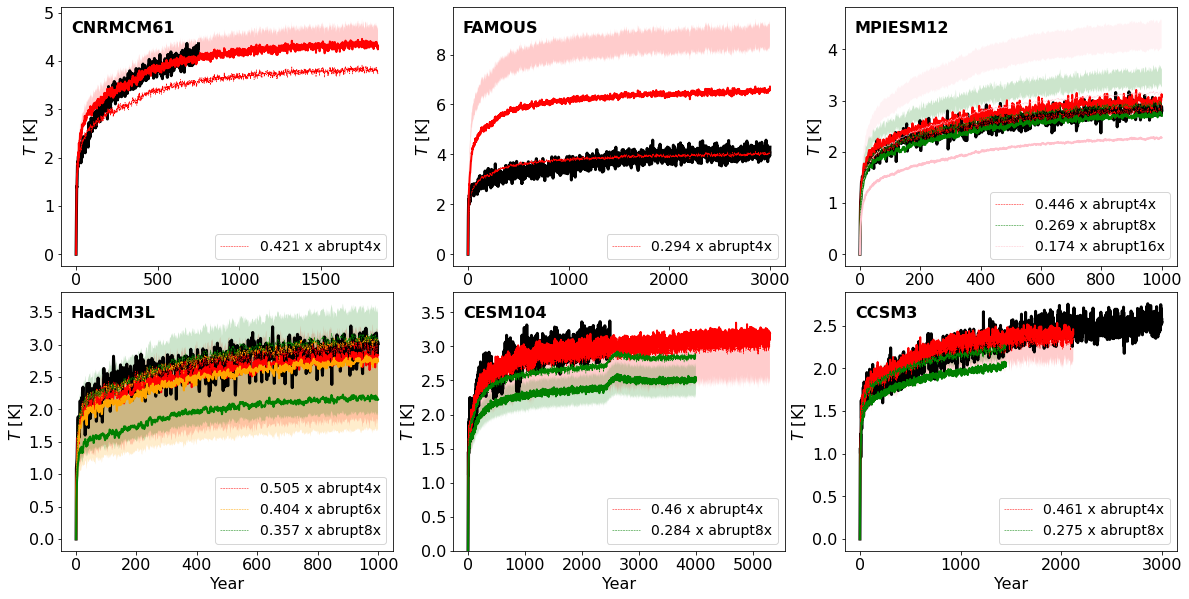

In [28]:
# include forcingratios from gregory regressions

fig, axes = plt.subplots(ncols = 3, nrows = 2, figsize = (20,2*5))
axes = np.concatenate(axes)

for (m, model) in enumerate(T_year500_abrupt2x_sorted.keys()):
    ax = axes[m]
    ax.text(0.03, 0.9, model, fontweight = 'bold', transform=ax.transAxes, fontsize = 16)
    ax.tick_params(axis='both', labelsize = 16)
    if model == 'CESM104':
        ax.set_ylim(0,3.8) # just for more space between curve and model name
    # define x-label:
    if m in [3, 4, 5]:
        ax.set_xlabel('Year', fontsize = 16)
    ax.set_ylabel('$T$ [K]', fontsize = 16)

    #for exp in ['abrupt2x','abrupt4x']:
    for exp in experiments[model]:
        co2factor = exp[6:].replace('x','')
        print(co2factor)
        model_index = [i for i,x in enumerate(files_model_names) if x==model]
        model_files = [file_list[model_index[k]] for k in range(len(model_index))]
        model_exp_files = [file_list[model_index[k]] for k in range(len(model_index)) if file_list_namesplits[model_index[k]][2] == exp]
        model_exp_files.sort() # make sure tas is the last file
        ds_tas = xr.open_dataset(directory + model_exp_files[-1])
        deltaT0 = np.concatenate([[0],ds_tas.tas.values])
        
        if exp == 'abrupt2x':
            color = 'black'
            ax.plot(deltaT0, color = color, linewidth = 3)
            continue
            
        # same ratio for all models first:   
        elif exp == 'abrupt4x':
            forcingratio = f2x/f4x #0.476
            color = 'red'
        elif exp == 'abrupt6x':
            forcingratio = f2x/f6x
            color = 'orange'
        elif exp == 'abrupt8x':
            forcingratio = 1/4 
            color = 'green'
        elif exp == 'abrupt16x':
            forcingratio = 1/8
            color = 'pink'
        ax.plot(deltaT0*forcingratio, color = color, linewidth = 2)
        
        # then with forcingratio from gregory regressions
        if exp == 'abrupt4x':
            ratio_df = pd.read_csv('../Other_estimates/forcing_ratios_2x_to_4x_longrunmip.csv', index_col=0)
            forcingratio = ratio_df.loc[model]['Mean']
            color = 'red'
            label = str(np.round(forcingratio,3)) + ' x abrupt4x'
        elif exp == 'abrupt6x':
            ratio_df = pd.read_csv('../Other_estimates/forcing_ratios_2x_to_6x_longrunmip.csv', index_col=0)
            forcingratio = ratio_df.loc[model]['Mean']
            color = 'orange'
            label = str(np.round(forcingratio,3)) + ' x abrupt6x'
        elif exp == 'abrupt8x':
            ratio_df = pd.read_csv('../Other_estimates/forcing_ratios_2x_to_8x_longrunmip.csv', index_col=0)
            forcingratio = ratio_df.loc[model]['Mean']
            color = 'green'
            label = str(np.round(forcingratio,3)) + ' x abrupt8x'
        elif exp == 'abrupt16x':
            ratio_df = pd.read_csv('../Other_estimates/forcing_ratios_2x_to_16x_longrunmip.csv', index_col=0)
            forcingratio = ratio_df.loc[model]['Mean']
            color = 'pink'
            label = str(np.round(forcingratio,3)) + ' x abrupt16x'
        #ax.plot(deltaT0*forcingratio, ':', color = color, linewidth = 2, label = label)
        minratio = ratio_df.loc[model]['5':'30'].min()
        maxratio = ratio_df.loc[model]['5':'30'].max()
        ax.fill_between(np.arange(0, len(deltaT0)), deltaT0*minratio, deltaT0*maxratio, color = color, alpha = 0.2, edgecolor = None)
        
        # then with forcing ratio computed from temperature ratio 
        if exp != 'abrupt2x':
            deltaT0 *= 1/mean_T_ratios[model][exp]
            
        if exp == 'abrupt4x':
            color = 'red'
            label = str(np.round(1/mean_T_ratios[model][exp],3)) + ' x abrupt4x'
        elif exp == 'abrupt6x':
            color = 'orange'
            label = str(np.round(1/mean_T_ratios[model][exp],3)) + ' x abrupt6x'
        elif exp == 'abrupt8x':
            color = 'green'
            label = str(np.round(1/mean_T_ratios[model][exp],3)) + ' x abrupt8x'
        elif exp == 'abrupt16x':
            color = 'pink'
            label = str(np.round(1/mean_T_ratios[model][exp],3)) + ' x abrupt16x'
            
        ax.plot(deltaT0, '--', color = color, label = label, linewidth = 0.5)
        
        
        
    ax.legend(loc = 'lower right', fontsize = 14)
    #ax.legend(loc = (0.58,0.075), fontsize = 14)
plt.subplots_adjust(hspace=0.1, wspace = 0.18)
#plt.subplots_adjust(hspace=0.1, wspace = 0.0325)
#plt.savefig('../Figures/abruptCO2exp_comparison_150ratios_longrunmip_gregregshading.pdf', format='pdf', dpi=600, bbox_inches="tight")


In [18]:
ratio_df = pd.read_csv('../Other_estimates/forcing_ratios_2x_to_4x_longrunmip.csv', index_col=0)
ratio_df.loc[model]

5       0.483946
10      0.488038
20      0.410738
30      0.432791
Mean    0.453878
Name: CCSM3, dtype: float64

In [23]:
ratio_df.loc[model]['5':'30'].min()

0.4107382648500159

2
4
2
4
2
4
8
16
2
4
6
8
2
4
8
2
4
8


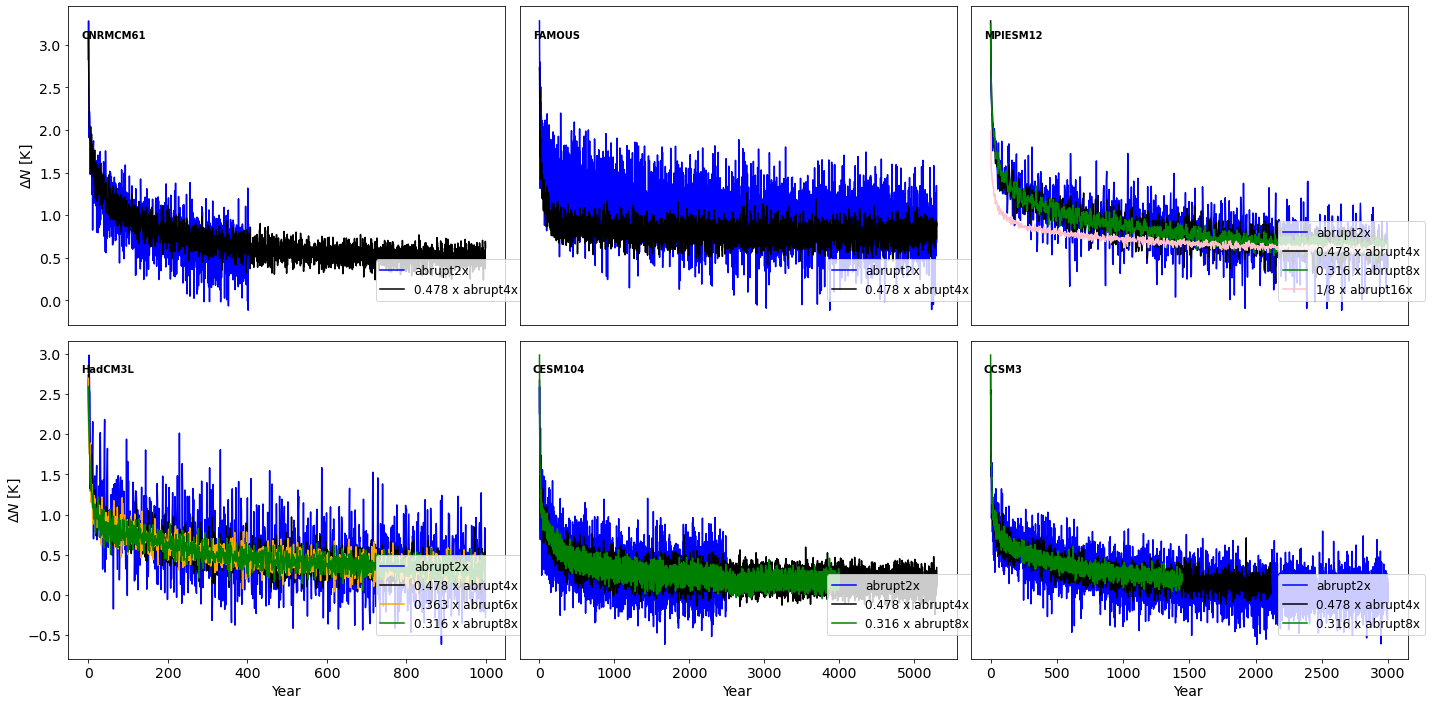

In [56]:
fig, axes = plt.subplots(ncols = 3, nrows = 2, figsize = (2*12,2*6))
axes = np.concatenate(axes)

for (m, model) in enumerate(T_year50_abrupt2x_sorted.keys()):
#for (m, model) in enumerate(experiments.keys()):
    ax = axes[m]
    ax.text(0.03, 0.9, model, fontweight = 'bold', transform=ax.transAxes)
    ax.tick_params(axis='both', labelsize = 14)
    
    # define x-label:
    if m in [3, 4, 5]:
        ax.set_xlabel('Year', fontsize = 14)
    else: 
        ax.axes.xaxis.set_visible(False)
    if m in [0, 3]:
        ax.set_ylabel('$\Delta N$ [K]', fontsize = 14)
    else:
        ax.axes.yaxis.set_visible(False)

    for exp in experiments[model]:
        co2factor = exp[6:].replace('x','')
        print(co2factor)
        model_index = [i for i,x in enumerate(files_model_names) if x==model]
        model_files = [file_list[model_index[k]] for k in range(len(model_index))]
        model_exp_files = [file_list[model_index[k]] for k in range(len(model_index)) if file_list_namesplits[model_index[k]][2] == exp]
        model_exp_files.sort() # make sure tas is the last file
        #print(model_exp_files)
        ds_toarad = xr.open_dataset(directory + model_exp_files[0])
        toarad = ds_toarad['netTOA'].values
        if exp == 'abrupt2x':
            toarad *= 1 #0.476
            color = 'blue'
            label = 'abrupt2x'
        elif exp == 'abrupt4x':
            toarad *= f2x/f4x #0.476
            color = 'black'
            label = str(np.round(f2x/f4x, 3)) + ' x abrupt4x'
        elif exp == 'abrupt6x':
            toarad *= f2x/f6x
            color = 'orange'
            label = str(np.round(f2x/f6x, 3)) + ' x abrupt6x'
        elif exp == 'abrupt8x':
            toarad *= f2x/f8x  
            color = 'green'
            label = str(np.round(f2x/f8x, 3)) + ' x abrupt8x'
        elif exp == 'abrupt16x':
            toarad *= 1/8
            #deltaT0 *= f2x/f16x  
            color = 'pink'
            label = '1/8' + ' x abrupt16x'
        
        #if model == 'MPIESM12': # then define labels
        ax.plot(toarad, color = color, label = label)
        #else: 
        #    ax.plot(deltaT0, color = color)

    ax.legend(loc = (0.703,0.075), fontsize = 12)
plt.subplots_adjust(hspace=0.05, wspace = 0.0325)

2
4
2
4
2
4
8
16
2
4
6
8
2
4
8
2
4
8


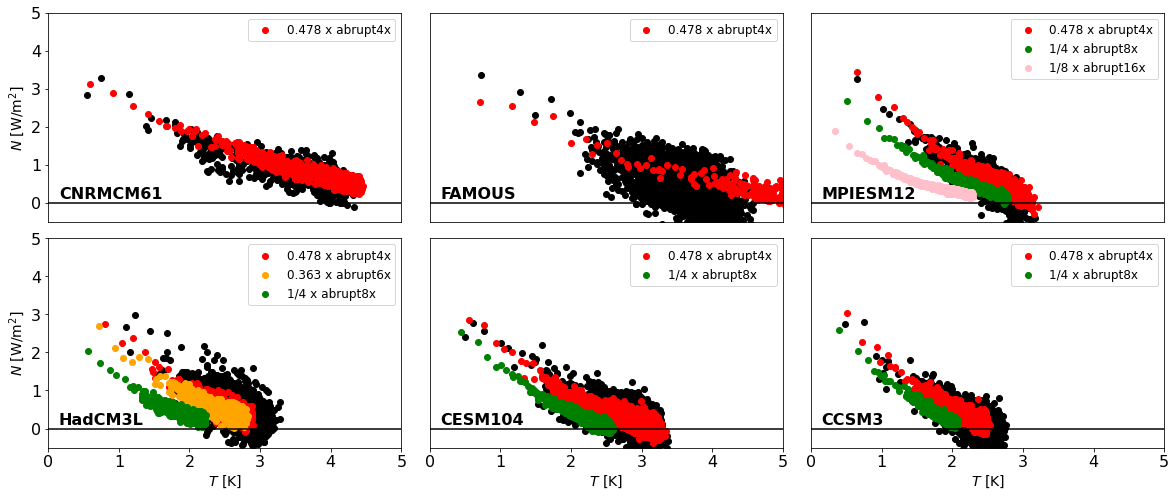

In [44]:
fig, axes = plt.subplots(ncols = 3, nrows = 2, figsize = (20,8))
axes = np.concatenate(axes)

for (m, model) in enumerate(T_year500_abrupt2x_sorted.keys()):
#for (m, model) in enumerate(experiments.keys()):
    ax = axes[m]
    ax.text(0.03, 0.11, model, fontweight = 'bold', transform=ax.transAxes, fontsize = 16)
    ax.tick_params(axis='both', labelsize = 16)
    ax.set_xlim(0,5)
    ax.set_ylim(-0.5,5);
    
    # define x-label:
    if m in [3, 4, 5]:
        ax.set_xlabel('$T$ [K]', fontsize = 14)
    else: 
        ax.axes.xaxis.set_visible(False)
    if m in [0, 3]:
        ax.set_ylabel('$N$ [W/m$^2$]', fontsize = 14)
    else:
        ax.axes.yaxis.set_visible(False)

    for exp in experiments[model]:
        co2factor = exp[6:].replace('x','')
        print(co2factor)
        model_index = [i for i,x in enumerate(files_model_names) if x==model]
        model_files = [file_list[model_index[k]] for k in range(len(model_index))]
        model_exp_files = [file_list[model_index[k]] for k in range(len(model_index)) if file_list_namesplits[model_index[k]][2] == exp]
        model_exp_files.sort() # make sure tas is the last file

        ds_tas = xr.open_dataset(directory + model_exp_files[-1])
        deltaT = ds_tas.tas.values
        
        ds_toarad = xr.open_mfdataset(directory + model_exp_files[0])
        toarad = ds_toarad['netTOA'].values
        
        if exp == 'abrupt2x':
            color = 'black'
            ax.scatter(deltaT, toarad, color = color)
            continue
            
        if exp == 'abrupt4x':
            forcingratio = f2x/f4x #0.476
            color = 'red'
            label = str(np.round(forcingratio, 3)) + ' x abrupt4x'
        elif exp == 'abrupt6x':
            forcingratio = f2x/f6x
            color = 'orange'
            label = str(np.round(forcingratio, 3)) + ' x abrupt6x'
        elif exp == 'abrupt8x':
            forcingratio = 1/4 
            color = 'green'
            label = '1/4' + ' x abrupt8x'
        elif exp == 'abrupt16x':
            forcingratio = 1/8
            color = 'pink'
            label = '1/8' + ' x abrupt16x'
        ax.scatter(deltaT*forcingratio, toarad*forcingratio, color = color, label = label)
    ax.axhline(y=0, color = 'black')
    ax.legend(loc = 'upper right', fontsize = 12)
plt.subplots_adjust(hspace=0.08, wspace = 0.08)
#plt.savefig('../Figures/abruptCO2exp_NvsT_longrunmip.pdf', format='pdf', dpi=600, bbox_inches="tight")


In [50]:
sum(np.isnan(ds_tas.tas.values)==False)

1000

In [ ]:
fig, axes = plt.subplots(ncols = 3, nrows = 2, figsize = (20,8))
axes = np.concatenate(axes)

for (m, model) in enumerate(T_year50_abrupt2x_sorted.keys()):
#for (m, model) in enumerate(experiments.keys()):
    ax = axes[m]
    ax.text(0.03, 0.11, model, fontweight = 'bold', transform=ax.transAxes, fontsize = 16)
    ax.tick_params(axis='both', labelsize = 16)
    ax.set_xlim(0,5)
    ax.set_ylim(-0.5,5);
    
    # define x-label:
    if m in [3, 4, 5]:
        ax.set_xlabel('$T$ [K]', fontsize = 14)
    else: 
        ax.axes.xaxis.set_visible(False)
    if m in [0, 3]:
        ax.set_ylabel('$N$ [W/m$^2$]', fontsize = 14)
    else:
        ax.axes.yaxis.set_visible(False)

    for exp in experiments[model]:
        co2factor = exp[6:].replace('x','')
        print(co2factor)
        model_index = [i for i,x in enumerate(files_model_names) if x==model]
        model_files = [file_list[model_index[k]] for k in range(len(model_index))]
        model_exp_files = [file_list[model_index[k]] for k in range(len(model_index)) if file_list_namesplits[model_index[k]][2] == exp]
        model_exp_files.sort() # make sure tas is the last file

        ds_tas = xr.open_dataset(directory + model_exp_files[-1])
        deltaT = ds_tas.tas.values
        
        ds_toarad = xr.open_mfdataset(directory + model_exp_files[0])
        toarad = ds_toarad['netTOA'].values
        
        if exp != 'abrupt2x':
            deltaT *= 1/mean_T_ratios[model][exp]
            toarad *= 1/mean_T_ratios[model][exp]
        
        if exp == 'abrupt2x':
            deltaT *= 1
            toarad *= 1
            color = 'blue'
            label = 'abrupt2x'
        elif exp == 'abrupt4x':
            color = 'black'
            label = str(np.round(1/mean_T_ratios[model][exp],3))  + ' x abrupt4x'
        elif exp == 'abrupt6x':
            color = 'orange'
            label = str(np.round(1/mean_T_ratios[model][exp],3))  + ' x abrupt6x'
        elif exp == 'abrupt8x':
            color = 'green'
            label = str(np.round(1/mean_T_ratios[model][exp],3))  + ' x abrupt8x'
        elif exp == 'abrupt16x':
            color = 'pink'
            label = str(np.round(1/mean_T_ratios[model][exp],3))  + ' x abrupt16x'
        ax.scatter(deltaT, toarad, color = color, label = label)
        
    ax.axhline(y=0, color = 'black')
    ax.legend(loc = 'upper right', fontsize = 12)
plt.subplots_adjust(hspace=0.08, wspace = 0.08)
#plt.savefig('../Figures/abruptCO2exp_NvsT_longrunmip.pdf', format='pdf', dpi=600, bbox_inches="tight")
